# 1 Computational Narrative: Visual Analysis of Fitness Data

## 1.1 Adherence to Rule et al's Ten Rules:

### Rule 1: Tell a Story for an Audience Implementation:
• **Bar Chart of Total Distance**: The bar chart visualizes the cube root of the total daily distance traveled. This transformation helps manage skewed data, making trends clearer. The interactive tooltips provide detailed information, enhancing user engagement and making the visualization more informative.

• **Line Plot of Enhanced Speed**: The line plot shows mean, maximum, and minimum enhanced speeds over time. This method highlights variations and trends, allowing users to observe changes in performance metrics across different dates.

• **Heatmap of Special Metrics**: The heatmap normalizes multiple metrics to a common scale, revealing patterns and anomalies. Highlighting the most and least productive days, and the strongest and weakest metrics, allows users to quickly grasp key insights from the data.

**Storytelling Approach**: These visualizations tell a story about performance trends and patterns over time. By focusing on specific metrics and dates, users can easily understand how activity levels and performance metrics evolved, providing a narrative of the user's fitness journey.

### Rule 2: Document the Process, Not Just the Results Implementation:
• **Data Cleaning Function**: The prepare_data function documents the steps taken to clean and prepare the data, including converting timestamps, extracting dates, and dropping rows with missing values. This process is crucial for ensuring the integrity of subsequent analyses.

• **Plotting Functions**: Each plotting function (plot_total_distance, plot_enhanced_speed, plot_heatmap, generate_combined_chart, generate_geographical_map) is well-documented with detailed docstrings explaining their purpose, arguments, and return values. This documentation helps users understand the role of each function in the overall analysis.

• **Code Comments**: The code includes comments explaining the logic behind specific operations, such as the normalization process and outlier detection. This makes it easier for others to follow and understand the analysis.

**Process Documentation**: Documenting the process ensures that the analysis can be replicated and understood by others. It also provides clarity on how each step contributes to the final results, making the notebook a useful resource for future reference or for others who may use or build upon the analysis.

### Rule 4: Modularize Code Implementation:
• **Function Definitions**: The notebook uses modular functions for different tasks, such as prepare_data, plot_total_distance, plot_enhanced_speed, plot_heatmap, generate_combined_chart, and generate_geographical_map. Each function handles a specific part of the analysis, promoting reusability and maintainability.

• **Normalization and Outlier Detection**: The normalization function is defined separately within generate_combined_chart, and Z-score calculation for outlier detection is modularized. This modular approach makes it easy to adjust or extend these functionalities without altering the core analysis code.

**Benefits of Modularization**: Modularizing code improves readability and maintainability. It allows for easier updates and debugging, as each function can be tested and modified independently. This approach also makes the codebase more organized and easier for others to understand and use.

## 1.2 Data Cleaning and Preparation:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
import math

# Load data
df = pd.read_csv('assets/strava.csv')

def prepare_data(df):
    """
    Prepare data for analysis by converting timestamps, extracting dates, and dropping NaNs in 'enhanced_altitude'.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    
    Returns:
        pd.DataFrame: The cleaned and prepared DataFrame.
    """
    # Count and print NaNs before cleaning
    print("NaN values before cleaning:")
    print(df.isna().sum())
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    
    # Drop rows where any of the specified columns are NaN
    df.dropna(subset=['enhanced_altitude', 'enhanced_speed', 'heart_rate', 'position_lat', 'position_long'], inplace=True)
    
    # Count and print NaNs after cleaning
    print("\nNaN values after cleaning:")
    print(df.isna().sum())
    
    # Drop rows where enhanced_speed is equal to 0
    df = df[df['enhanced_speed'] != 0]
    
    return df

# Preview initial rows of prepared data
print("Initial Data Preview:")
df = prepare_data(df)
df.head()

Initial Data Preview:
NaN values before cleaning:
Air Power               22807
Cadence                 22802
Form Power              22807
Ground Time             22802
Leg Spring Stiffness    22807
Power                   22802
Vertical Oscillation    22802
altitude                25744
cadence                    22
datafile                    0
distance                    0
enhanced_altitude          51
enhanced_speed             10
fractional_cadence         22
heart_rate               2294
position_lat              192
position_long             192
speed                   25721
timestamp                   0
unknown_87                 22
unknown_88               2294
unknown_90              22031
dtype: int64

NaN values after cleaning:
Air Power               20352
Cadence                 20347
Form Power              20352
Ground Time             20347
Leg Spring Stiffness    20352
Power                   20347
Vertical Oscillation    20347
altitude                23386
cadence  

,Air Power,Cadence,Form Power,Ground Time,Leg Spring Stiffness,Power,Vertical Oscillation,altitude,cadence,datafile,...,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp,unknown_87,unknown_88,unknown_90,date
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3747.0,77.0,activities/2675855419.fit.gz,...,0.0,77.0,504432050.0,-999063637.0,1866.0,2019-07-08 21:04:14,0.0,100.0,NaN,2019-07-08
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.0,77.0,activities/2675855419.fit.gz,...,0.0,80.0,504432492.0,-999064534.0,1894.0,2019-07-08 21:04:15,0.0,100.0,NaN,2019-07-08
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3799.0,77.0,activities/2675855419.fit.gz,...,0.0,83.0,504432667.0,-999064622.0,1894.0,2019-07-08 21:04:16,0.0,100.0,NaN,2019-07-08
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3802.0,77.0,activities/2675855419.fit.gz,...,0.0,83.0,504432736.0,-999064796.0,1903.0,2019-07-08 21:04:17,0.0,300.0,NaN,2019-07-08
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3811.0,77.0,activities/2675855419.fit.gz,...,0.0,86.0,504432914.0,-999064984.0,1997.0,2019-07-08 21:04:18,0.0,300.0,NaN,2019-07-08


**Insight:**
• Loaded the data and converted the timestamp to a datetime object.
• Extracted the date from the timestamp to facilitate day-by-day analysis.
• Dropped rows with missing values in the enhanced_altitude column to ensure clean data for analysis.

**Initial Data Preview Notes:**
• Data includes columns such as 'Air Power', 'Cadence', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 'Power', 'Vertical Oscillation', and various metrics for detailed analysis.
• The focus will be on enhanced_speed and enhanced_altitude instead of speed and altitude to provide a more comprehensive view.

## 1.3 Basic Visual Analysis Techniques:

### 1.3.1 Bar Chart

**Justification:**
• Bar charts are effective for showing discrete quantities and comparing totals over time. The cube root transformation helps manage skewed distributions, making trends more interpretable. The interactive Tooltips enhance user engagement by providing detailed information on hover.

**Mechanics:**

In [2]:
def plot_total_distance(df):
    """
    Plot a bar chart of the cube root of total daily distance, ensuring anomalies are removed.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    # Group data by date and calculate total distance
    df_grouped = df.groupby('date').agg({'distance': 'sum'}).reset_index()
    
    # Calculate cube root of total distance
    df_grouped['cbrt_distance'] = np.cbrt(df_grouped['distance'])
    
    # Create the plot
    fig = go.Figure()
    
    fig.add_trace(go.Bar(
        x=df_grouped['date'],
        y=df_grouped['cbrt_distance'],
        name='Total Distance',
        marker=dict(color='goldenrod', line=dict(color='black', width=1.5)),
        hovertemplate='Date: %{x}<br>Distance: %{y:.2f}',
    ))
    
    fig.update_layout(
        title='Daily Total Distance (Cube Scale)',
        xaxis_title='Date',
        yaxis_title='Cube of Total Distance(meters)',
        xaxis_tickangle=-45,
        hovermode='x unified',
        legend=dict(x=0, y=1.0),
        margin=dict(l=40, r=40, t=40, b=40),
        height=600,
        width=1000
    )
    
    fig.show()

# Example usage
plot_total_distance(df)

**Insight:** The Bar Chart reveals that dates after September 29 show the longest distance traveled. This indicates a potential increase in activity or a change in tracking patterns post that date.

### 1.3.2 Line Plot

**Justification:**
• Line plots are ideal for displaying trends over time. Comparing mean, maximum, and minimum speeds provides a comprehensive view of speed performance fluctuations.

**Mechanics:**

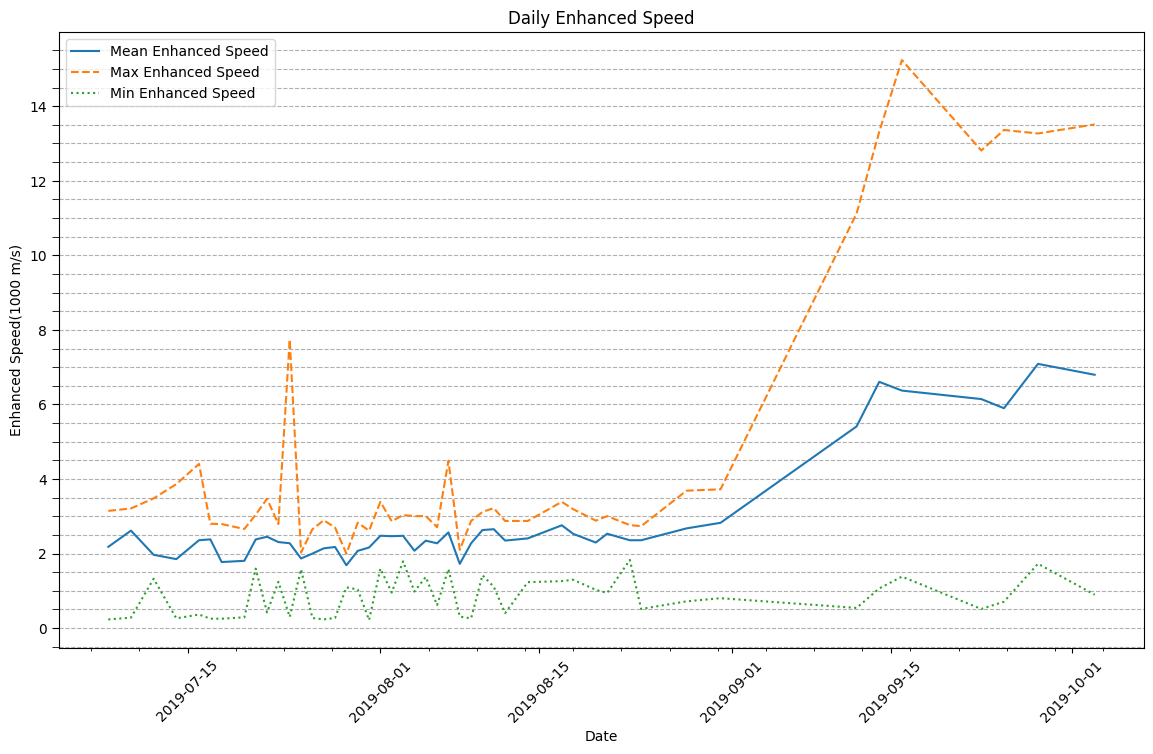

In [3]:
def plot_enhanced_speed(df):
    """
    Plot a line chart of the mean, max, and min enhanced speed over time.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    # Drop rows where enhanced_speed is equal to 0
    df = df[df['enhanced_speed'] != 0]
    
    df_grouped = df.groupby('date').agg({
        'enhanced_speed': ['mean', 'max', 'min']
    }).reset_index()
    
    df_grouped.columns = ['date', 'mean_enhanced_speed', 'max_enhanced_speed', 'min_enhanced_speed']
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_grouped, x='date', y='mean_enhanced_speed', label='Mean Enhanced Speed')
    sns.lineplot(data=df_grouped, x='date', y='max_enhanced_speed', label='Max Enhanced Speed', linestyle='--')
    sns.lineplot(data=df_grouped, x='date', y='min_enhanced_speed', label='Min Enhanced Speed', linestyle=':')
    
    plt.title('Daily Enhanced Speed')
    plt.xlabel('Date')
    plt.ylabel('Enhanced Speed(1000 m/s)')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Add horizontal grid and sub notches on the y-axis
    plt.grid(axis='y', linestyle='--', which='both')  # Add grid lines for both major and minor ticks
    plt.minorticks_on()  # Enable minor ticks
    plt.tick_params(axis='y', which='both', length=5)  # Customize tick length
    
    plt.show()

# Example usage
plot_enhanced_speed(df)

**Insight:**
• Reveals that dates after September 1, 2019, exhibit greater variance between the minimum, maximum, and mean enhanced speed. This may suggests a difference in activities during this period.

### 1.3.3 Heatmap

**Justification:**
• Heatmaps effectively display complex data matrices and highlight patterns and anomalies across multiple dimensions. Normalizing the data ensures comparability between metrics. Highlighting/outlining provides visual emphasis on key days and metrics enhances interpretability.

**Mechanics:**

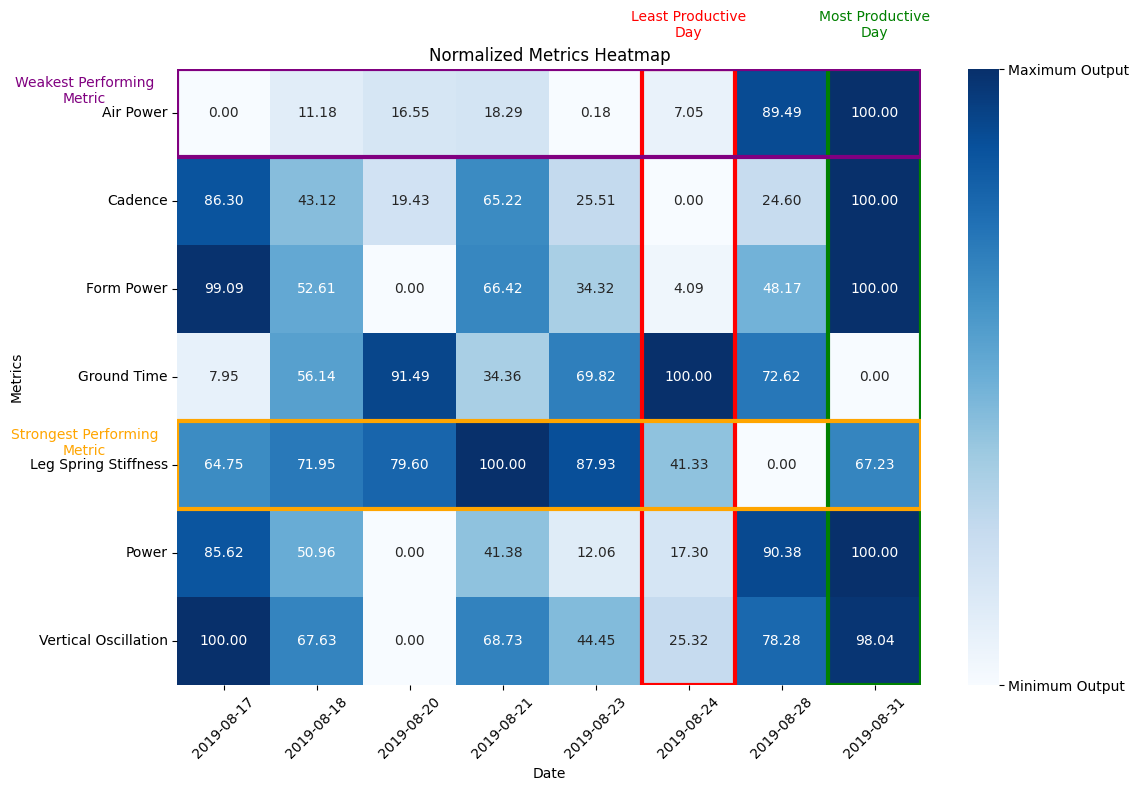

In [4]:
def plot_heatmap(df):
    """
    Plot a heatmap of normalized special metrics.
    
    Args:
        df (pd.DataFrame): The input DataFrame.
    """
    special_metrics = ['Air Power', 'Cadence', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 'Power', 'Vertical Oscillation']
    
    df_with_special_metrics = df.dropna(subset=special_metrics)
    
    df_with_special_metrics_grouped = df_with_special_metrics.groupby('date').agg({
        'Air Power': 'mean',
        'Cadence': 'mean',
        'Form Power': 'mean',
        'Ground Time': 'mean',
        'Leg Spring Stiffness': 'mean',
        'Power': 'mean',
        'Vertical Oscillation': 'mean'
    }).reset_index()
    
    for col in special_metrics:
        min_val = df_with_special_metrics_grouped[col].min()
        max_val = df_with_special_metrics_grouped[col].max()
        df_with_special_metrics_grouped[col] = (df_with_special_metrics_grouped[col] - min_val) / (max_val - min_val) * 100
    
    df_with_special_metrics_grouped['Total'] = df_with_special_metrics_grouped[special_metrics].sum(axis=1)
    
    most_productive_day = df_with_special_metrics_grouped.loc[df_with_special_metrics_grouped['Total'].idxmax(), 'date']
    least_productive_day = df_with_special_metrics_grouped.loc[df_with_special_metrics_grouped['Total'].idxmin(), 'date']
    
    metric_totals = df_with_special_metrics_grouped[special_metrics].sum()
    strongest_metric = metric_totals.idxmax()
    weakest_metric = metric_totals.idxmin()
    
    plt.figure(figsize=(12, 8))
    heatmap_data = df_with_special_metrics_grouped.set_index('date').T.drop('Total')
    ax = sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".2f")
    
    # Add colorbar with custom labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 100])
    cbar.set_ticklabels(['Minimum Output', 'Maximum Output'])
    
    most_productive_idx = df_with_special_metrics_grouped[df_with_special_metrics_grouped['date'] == most_productive_day].index[0]
    least_productive_idx = df_with_special_metrics_grouped[df_with_special_metrics_grouped['date'] == least_productive_day].index[0]
    
    strongest_metric_idx = special_metrics.index(strongest_metric)
    weakest_metric_idx = special_metrics.index(weakest_metric)
    
    ax.add_patch(plt.Rectangle((most_productive_idx, 0), 1, len(special_metrics), fill=False, edgecolor='green', lw=3))
    ax.add_patch(plt.Rectangle((least_productive_idx, 0), 1, len(special_metrics), fill=False, edgecolor='red', lw=3))
    
    for i, metric in enumerate(special_metrics):
        if metric == strongest_metric:
            ax.add_patch(plt.Rectangle((0, i), len(df_with_special_metrics_grouped['date']), 1, fill=False, edgecolor='orange', lw=3))
            plt.text(-1, i + 0.25, 'Strongest Performing\nMetric', color='orange', ha='center', va='center', fontsize=10)
        elif metric == weakest_metric:
            ax.add_patch(plt.Rectangle((0, i), len(df_with_special_metrics_grouped['date']), 1, fill=False, edgecolor='purple', lw=3))
            plt.text(-1, i + 0.25, 'Weakest Performing\nMetric', color='purple', ha='center', va='center', fontsize=10)
    
    plt.text(most_productive_idx + 0.5, -0.5, 'Most Productive\nDay', color='green', ha='center', va='center')
    plt.text(least_productive_idx + 0.5, -0.5, 'Least Productive\nDay', color='red', ha='center', va='center')
    
    plt.title('Normalized Metrics Heatmap')
    plt.xlabel('Date')
    plt.ylabel('Metrics')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
plot_heatmap(df)

**Insight**
• The most and least productive days and the strongest and weakest performing metrics have been highlighted. The Most Productive Day is identified as August 31 and the Least Productive Day is August 24. The measured Strongest Performing Metric is 'Power' while the Weakest Performing Metric is 'Leg Spring Stiffness'.

## 1.4 Advanced Visual Analysis Techniques:

### 1.4.1 Combined Line Plot + Bar Chart

**Justification:**
• The combined line plot and bar chart provide a multifaceted view of different metrics over time. This approach helps in visualizing both discrete and continuous data, allowing for a clear comparison between metrics such as enhanced speed, altitude, and heart rate. The line plot tracks continuous changes, while the bar chart highlights peaks and troughs in altitude, making it easier to spot trends and anomalies. Normalization ensures comparability across metrics with different scales, transforming values into a common range (0-100%) for meaningful comparison. The "outlier detection" uses Z-scores to identify and exclude outliers, improving the accuracy of trend analysis.

**Mechanics:**

In [5]:
def generate_combined_chart(df, date_column, speed_column, altitude_column, heart_rate_column):
    """
    Generates a combined line plot + bar chart with enhanced altitude as the bar chart and
    enhanced speed and heart rate as separate lines.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - date_column: str, name of the column with the date information
    - speed_column: str, name of the column with the speed information
    - altitude_column: str, name of the column with the altitude information
    - heart_rate_column: str, name of the column with the heart rate information
    
    Returns:
    - None (displays the plot)
    """
    # Calculate Z-scores
    z_scores = stats.zscore(df[[speed_column, altitude_column, heart_rate_column]])
    abs_z_scores = abs(z_scores)
    
    # Identify outliers
    outlier_entries = (abs_z_scores >= 3).any(axis=1)
    
    # Keep only non-outlier entries
    df = df[~outlier_entries]
    
    # Group data by date and calculate average values
    daily_avg = df.groupby(date_column).agg({
        speed_column: 'mean',
        altitude_column: 'mean',
        heart_rate_column: 'mean'
    }).reset_index()
    
    # Normalize function
    def normalize(series):
        return 100 * (series - series.min()) / (series.max() - series.min())
    
    # Normalize only speed and heart rate columns
    for col in [speed_column, heart_rate_column]:
        daily_avg[col] = normalize(daily_avg[col])
    
    # Sort by altitude for combined chart
    daily_avg_sorted = daily_avg.sort_values(by=altitude_column, ascending=False).reset_index(drop=True)
    
    # Create the combined chart
    fig = go.Figure()
    
    # Add bar chart for enhanced altitude
    fig.add_trace(go.Bar(
        x=daily_avg_sorted[date_column],
        y=daily_avg_sorted[altitude_column],
        name='Enhanced Altitude',
        marker=dict(
            color="black",
            line=dict(
                color='blue',
                width=1.5  # Adjust the width as needed
            )
        ),
        yaxis='y1'
    ))
    
    # Add line for enhanced speed (chronological order)
    fig.add_trace(go.Scatter(
        x=daily_avg[date_column],
        y=daily_avg[speed_column],
        mode='lines+markers',
        name='Enhanced Speed',
        line=dict(color='orange'),
        yaxis='y2'
    ))
    
    # Add line for heart rate (chronological order)
    fig.add_trace(go.Scatter(
        x=daily_avg[date_column],
        y=daily_avg[heart_rate_column],
        mode='lines+markers',
        name='Heart Rate',
        line=dict(color='limegreen'),
        yaxis='y2'
    ))
    
    # Update layout
    fig.update_layout(
        title='Combined Line Plot + Bar Chart of Enhanced Altitude with Enhanced Speed and Heart Rate',
        xaxis_title='Date',
        yaxis=dict(
            title='Enhanced Altitude(meters)',
            side='left'
        ),
        yaxis2=dict(
            title='Enhanced Speed and Heart Rate (Normalized)',
            side='right',
            overlaying='y',
            range=[0, 100],
            gridcolor='lightsteelblue',
        ),
        xaxis_tickangle=-45,
        legend=dict(
            x=0.85,
            y=0.1,
            bgcolor='rgba(255, 255, 255, 0.9)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        width=1000,
        height=600
    )
    
    # Show the plot
    fig.show()

# Example usage
generate_combined_chart(df, 'date', 'enhanced_speed', 'enhanced_altitude', 'heart_rate')


**Insight:**
• The combined chart provides a comprehensive view of how enhanced speed and altitude trends evolve over time, alongside heart rate variations. This allows for better understanding of performance patterns and identifying dates with significant changes. For instance, August 17 shows the highest values for both altitude and heart rate, suggesting increased physical activity or effort on that date. Conversely, August 4 features the lowest values for all metrics, potentially indicating a day of reduced activity or rest.

### 1.4.2 Geographical Map

**Justification:**
• The geographical map allows for spatial visualization of enhanced speed data, highlighting geographical areas with varying speed levels on a specific date. This visualization is particularly useful for understanding the spatial distribution of performance metrics and identifying patterns or anomalies in specific locations. The date filtering in this instance enables analysis of performance data for a specific day, focusing on relevant temporal patterns. Mercator projection converts latitude into a Mercator projection for accurate mapping on a 2D plane. The outlier removal enhances the clarity of the visualization by excluding extreme values that could skew the results.

**Mechanics:**

Min Latitude: 42.285475647076964, Max Latitude: 42.301550125703216
Min Longitude: -84.29644564166665, Max Longitude: -84.28461207076907


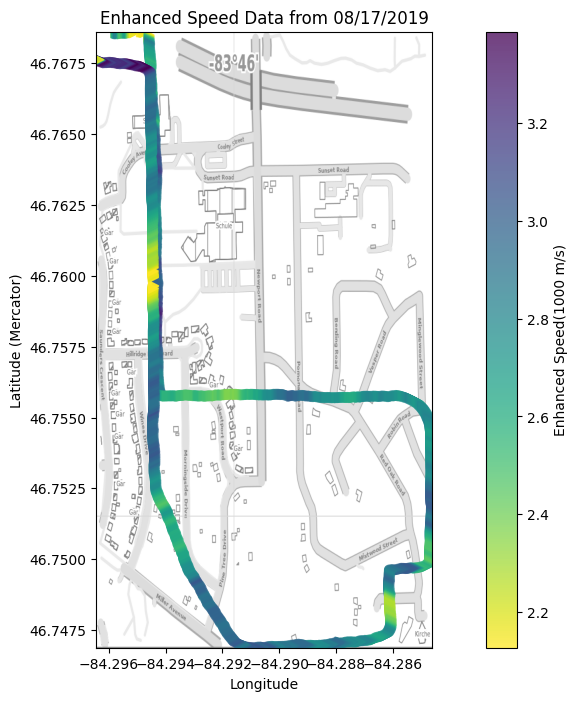

In [7]:
def generate_geographical_map(df, lat_column, long_column, speed_column, date_column, specific_date, map_image_path):
    """
    Generates a geographical map with enhanced speed as the color bar and
    position_long and position_lat as the coordinates, filtered by a specific date.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - lat_column: str, name of the column with the latitude information
    - long_column: str, name of the column with the longitude information
    - speed_column: str, name of the column with the speed information
    - date_column: str, name of the column with the date information
    - specific_date: str, date to filter the data, format 'YYYY-MM-DD'
    - map_image_path: str, file path to the map image
    
    Returns:
    - None (displays the plot)
    """
    # Convert timestamp to datetime format and filter by the specific date
    df[date_column] = pd.to_datetime(df[date_column])
    specific_date_dt = pd.to_datetime(specific_date)
    df_filtered_date = df[df[date_column].dt.date == specific_date_dt.date()]
    
    # Drop NaN values
    df_filtered_date = df_filtered_date.dropna(subset=[lat_column, long_column, speed_column])
    
    # Convert position_lat and position_long to degrees
    df_filtered_date["position_lat_degrees"] = df_filtered_date[lat_column] * (180 / 2**31)
    df_filtered_date["position_long_degrees"] = df_filtered_date[long_column] * (180 / 2**31)
    
    # Convert latitude to Mercator projection
    def lat2y(a):
        return 180.0 / math.pi * math.log(math.tan(math.pi / 4.0 + a * (math.pi / 180.0) / 2.0))
    
    df_filtered_date["position_lat_degrees_mercator"] = df_filtered_date["position_lat_degrees"].apply(lat2y)
    
    # Get the min and max lat/long for the map extent
    min_lat, max_lat = df_filtered_date["position_lat_degrees"].min(), df_filtered_date["position_lat_degrees"].max()
    min_long, max_long = df_filtered_date["position_long_degrees"].min(), df_filtered_date["position_long_degrees"].max()
    min_lat_mercator, max_lat_mercator = df_filtered_date["position_lat_degrees_mercator"].min(), df_filtered_date["position_lat_degrees_mercator"].max()
    
    print(f"Min Latitude: {min_lat}, Max Latitude: {max_lat}")
    print(f"Min Longitude: {min_long}, Max Longitude: {max_long}")
    
    # Remove outliers from the enhanced speed data
    Q1 = df_filtered_date[speed_column].quantile(0.25)
    Q3 = df_filtered_date[speed_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered_date[(df_filtered_date[speed_column] >= lower_bound) & (df_filtered_date[speed_column] <= upper_bound)]
    
    # Load the map image
    image = plt.imread(map_image_path)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the map image
    ax.imshow(image, alpha=0.5, extent=[min_long, max_long, min_lat_mercator, max_lat_mercator])
    
    # Plot the data points
    sc = ax.scatter(df_filtered["position_long_degrees"], df_filtered["position_lat_degrees_mercator"],
                   s=50, c=df_filtered[speed_column], cmap='viridis_r', alpha=0.75, marker='>')
    
    # Add a colorbar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Enhanced Speed(1000 m/s)")
    
    # Set plot title and labels
    date_str = specific_date_dt.strftime('%m/%d/%Y')  # Format date as MM/DD/YYYY
    plt.title(f"Enhanced Speed Data from {date_str}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude (Mercator)")
    
    plt.show()

# Example usage
generate_geographical_map(df, 'position_lat', 'position_long', 'enhanced_speed', 'timestamp', '2019-08-17', 'assets/map.png')


**Insight:**
• The geographical map provides a spatial representation of enhanced speed data for August 17, 2019. By visualizing data points on the map, it is possible to identify areas with higher or lower speeds and recognize patterns or clusters. For instance, certain regions show consistently high speeds while select regions are consistently low. This could indicate areas of interest or specific conditions affecting performance. The map also helps in detecting outliers/anomalies in spatial distribution that might warrant further investigation.

## 1.5 Summary:

This analysis provides a detailed examination of fitness data through various visualization techniques. The data preparation involved cleaning and normalizing key metrics, including enhanced speed and altitude. Visualizations, such as bar charts, line plots, and heatmaps, effectively illustrate trends and anomalies. Advanced techniques, including combined line and bar charts, as well as geographical maps, offer deeper insights into performance patterns and spatial distribution. Overall, the visualizations reveal significant variations and trends in performance metrics, aiding in the understanding of fitness data over time.
"